# AI Act and GDPR Data Cleanup and Analysis

This project was for my internship at Innovation Value Institute located at Maynooth University during June-August 2024 during my study abroad program in Dublin, Ireland. I was assigned to extract data from the EU's AI Act and the General Data Protection Regulation or GDPR. I focused on key words such as "anonymisation", "archiving", "backup", "compliance", etc to see if there were any overlapping articles between each of the documents. 

I then placed the data into two separate Google Sheets documents in order to lay out the parameters clearly. I then needed to implement the data into the software GraphDB using SQL to see if there were any nodes or connections between the AI Act and the GDPR.

Link to AI Act: https://docs.google.com/spreadsheets/d/17FqQXTQwY5R2Mm4JreTs69xGK-c-gR-kce98NZ_MNs8/edit?usp=sharing

Link to GDPR: https://docs.google.com/spreadsheets/d/1kH-Tg25ET-ZKPQgsKBU_OdXuGj7QraL9MtoQAG0x18s/edit?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
AI_GDPR = pd.read_csv("AI_GDPR_data.csv")

In [3]:
AI_GDPR.describe

<bound method NDFrame.describe of     Document       Key Words  Document Page Chapter Section  Article  \
0       GDPR        exchange              2       1       1      NaN   
1       GDPR        transfer             19       1       1      NaN   
2       GDPR   data exchange             21       1       1      NaN   
3       GDPR   data transfer             21       1       1      NaN   
4       GDPR        transfer             22       1       1      NaN   
..       ...             ...            ...     ...     ...      ...   
330   AI ACT      compliance            434    A-IV     NaN     11.0   
331   AI ACT      compliance            437    A-VI     NaN      NaN   
332   AI ACT      compliance            437    A-VI     NaN      NaN   
333   AI ACT  non-compliance            443   A-VII     NaN      NaN   
334   AI ACT      compliance            443   A-VII     NaN      NaN   

    Provision                                          Statement  
0           5  The exchange of per

In [4]:
AI_GDPR.head()

,Document,Key Words,Document Page,Chapter,Section,Article,Provision,Statement
0,GDPR,exchange,2,1,1,NaN,5,The exchange of personal data between public a...
1,GDPR,transfer,19,1,1,NaN,101,"A transfer could take place only if, subject t..."
2,GDPR,data exchange,21,1,1,NaN,112,Those derogations should in particular apply t...
3,GDPR,data transfer,21,1,1,NaN,113,Transfers which can be qualified as not repeti...
4,GDPR,transfer,22,1,1,NaN,115,Transfers should only be allowed where the con...


In [5]:
AI_GDPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Document       335 non-null    object 
 1   Key Words      335 non-null    object 
 2   Document Page  335 non-null    int64  
 3   Chapter        335 non-null    object 
 4   Section        326 non-null    object 
 5   Article        204 non-null    float64
 6   Provision      335 non-null    object 
 7   Statement      335 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 21.1+ KB


In [6]:
AI_GDPR.describe()

,Document Page,Article
count,335.000000,204.000000
mean,168.519403,47.421569
std,133.768318,28.500777
min,2.000000,2.000000
25%,54.000000,22.750000
50%,125.000000,48.000000
75%,292.000000,74.000000
max,450.000000,111.000000


In [7]:
print(AI_GDPR.columns)
print(AI_GDPR.head())

Index(['Document', 'Key Words', 'Document Page', 'Chapter', 'Section',
       'Article', 'Provision', 'Statement'],
      dtype='object')
  Document      Key Words  Document Page Chapter Section  Article Provision  \
0     GDPR       exchange              2       1       1      NaN         5   
1     GDPR       transfer             19       1       1      NaN       101   
2     GDPR  data exchange             21       1       1      NaN       112   
3     GDPR  data transfer             21       1       1      NaN       113   
4     GDPR       transfer             22       1       1      NaN       115   

                                           Statement  
0  The exchange of personal data between public a...  
1  A transfer could take place only if, subject t...  
2  Those derogations should in particular apply t...  
3  Transfers which can be qualified as not repeti...  
4  Transfers should only be allowed where the con...  


# Displaying Columns Linked with Key Words

In [8]:
keywords_column = AI_GDPR['Key Words']

unique_keywords = set()

for keywords in keywords_column:
    if isinstance(keywords, str):
        unique_keywords.update(keywords.split(', '))

sorted_keywords = sorted(unique_keywords)

print("List of all unique keywords (sorted alphabetically):")
for keyword in sorted_keywords:
    print(keyword)


List of all unique keywords (sorted alphabetically):
anonymisation
archiving
backup
compliance
confidential
confidentiality
data exchange
data transfer
encryption
exchange
handling
integrity
non-compliance
privacy
pseudonymising
retention
security
sharing
storage
store
stored
transfer


In [40]:
keyword = 'anonymisation'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document      Key Words  Document Page Chapter Section  Article Provision
211   AI ACT  anonymisation             69       1       1      NaN        69


In [10]:
keyword = 'archiving'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

   Document  Key Words  Document Page Chapter Section  Article Provision
43     GDPR  archiving             10       1       1      NaN        52
44     GDPR  archiving             10       1       1      NaN        53
45     GDPR  archiving             12       1       1      NaN        62
50     GDPR  archiving             29       1       1      NaN       156
53     GDPR  archiving             35      II       1      5.0        1B
55     GDPR  archiving             39      II       1      9.0        2J
58     GDPR  archiving             42     III       2     14.0        5B
62     GDPR  archiving             84      IX       1     89.0         1
63     GDPR  archiving             85      IX       1     89.0         3


In [11]:
keyword = 'backup'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document Key Words  Document Page Chapter Section  Article Provision
118   AI ACT    backup            215     III       2     15.0         4


In [12]:
keyword = 'compliance'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document       Key Words  Document Page Chapter Section  Article Provision
76      GDPR      compliance             15       1       1      NaN        77
78      GDPR      compliance             16       1       1      NaN        81
79      GDPR      compliance             16       1       1      NaN        84
80      GDPR      compliance             18       1       1      NaN        95
81      GDPR      compliance             18       1       1      NaN        96
..       ...             ...            ...     ...     ...      ...       ...
330   AI ACT      compliance            434    A-IV     NaN     11.0        2G
331   AI ACT      compliance            437    A-VI     NaN      NaN         2
332   AI ACT      compliance            437    A-VI     NaN      NaN         3
333   AI ACT  non-compliance            443   A-VII     NaN      NaN       4.6
334   AI ACT      compliance            443   A-VII     NaN      NaN       4.7

[148 rows x 7 columns]


In [13]:
keyword = 'confidential'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document        Key Words  Document Page Chapter Section  Article  \
64      GDPR  confidentiality              9       1       1      NaN   
65      GDPR  confidentiality             15       1       1      NaN   
66      GDPR  confidentiality             16       1       1      NaN   
68      GDPR  confidentiality             30       1       1      NaN   
69      GDPR     confidential             30       1       1      NaN   
71      GDPR  confidentiality             52      IV       2     32.0   
126   AI ACT  confidentiality             12       1       1      NaN   
147   AI ACT     confidential             98       1       1      NaN   
152   AI ACT  confidentiality            136       1       1      NaN   
153   AI ACT  confidentiality            137       1       1      NaN   
154   AI ACT  confidentiality            150       1       1      NaN   
155   AI ACT     confidential            150       1       1      NaN   
160   AI ACT  confidentiality            164       

In [14]:
keyword = 'confidentiality'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document        Key Words  Document Page Chapter Section  Article  \
64      GDPR  confidentiality              9       1       1      NaN   
65      GDPR  confidentiality             15       1       1      NaN   
66      GDPR  confidentiality             16       1       1      NaN   
68      GDPR  confidentiality             30       1       1      NaN   
71      GDPR  confidentiality             52      IV       2     32.0   
126   AI ACT  confidentiality             12       1       1      NaN   
152   AI ACT  confidentiality            136       1       1      NaN   
153   AI ACT  confidentiality            137       1       1      NaN   
154   AI ACT  confidentiality            150       1       1      NaN   
160   AI ACT  confidentiality            164       I       1      2.0   
165   AI ACT  confidentiality            205     III       2     10.0   
166   AI ACT  confidentiality            216     III       2     15.0   
169   AI ACT  confidentiality            226     II

In [15]:
keyword = 'data exchange'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

  Document      Key Words  Document Page Chapter Section  Article Provision
2     GDPR  data exchange             21       1       1      NaN       112


In [16]:
keyword = 'data transfer'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

   Document      Key Words  Document Page Chapter Section  Article Provision
3      GDPR  data transfer             21       1       1      NaN       113
13     GDPR  data transfer             57      IV       5     40.0         3
19     GDPR  data transfer             63       V       5     47.0        2B
21     GDPR  data transfer             64       V       5     49.0         1
35     GDPR  data transfer             77     VII       3     70.0        1J


In [17]:
keyword = 'encryption'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document   Key Words  Document Page Chapter Section  Article Provision
212   AI ACT  encryption             69       1       1      NaN        69


In [18]:
keyword = 'exchange'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document      Key Words  Document Page Chapter Section  Article Provision
0       GDPR       exchange              2       1       1      NaN         5
2       GDPR  data exchange             21       1       1      NaN       112
6       GDPR       exchange             31       1       1      NaN       168
30      GDPR       exchange             65       V       5     50.0        1B
31      GDPR       exchange             65       V       5     50.0        1D
32      GDPR       exchange             71     VII       1     60.0         1
33      GDPR       exchange             76     VII       1     67.0         1
34      GDPR       exchange             77     VII       3     70.0        1C
36      GDPR       exchange             78     VII       3     70.0        1U
37      GDPR       exchange             78     VII       3     70.0        1W
104   AI ACT       exchange            135       1       1      NaN       149
105   AI ACT       exchange            149       1       1      

In [19]:
keyword = 'handling'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document Key Words  Document Page Chapter Section  Article Provision
67      GDPR  handling             23       1       1      NaN       122
72      GDPR  handling             63       V       1     47.0        2H
137   AI ACT  handling             50       1       1      NaN        53
145   AI ACT  handling             90       1       1      NaN        96
167   AI ACT  handling            221     III       3     17.0        1J


In [20]:
keyword = 'integrity'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document  Key Words  Document Page Chapter Section  Article Provision
75      GDPR  integrity              9       1       1      NaN        49
85      GDPR  integrity             21       1       1      NaN       112
86      GDPR  integrity             22       1       1      NaN       121
94      GDPR  integrity             49      IV       2     32.0        1B
202   AI ACT  integrity             28       1       1      NaN        27
205   AI ACT  integrity             52       1       1      NaN        55
209   AI ACT  integrity             68       1       1      NaN        67
230   AI ACT  integrity            119       1       1      NaN       133
244   AI ACT  integrity            150       1       1      NaN       167
249   AI ACT  integrity            172       I       1      3.0        38
267   AI ACT  integrity            250     III       4     31.0         5
268   AI ACT  integrity            251     III       4     31.0        10


In [21]:
keyword = 'non-compliance'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document       Key Words  Document Page Chapter Section  Article Provision
241   AI ACT  non-compliance            144       1       1      NaN       160
259   AI ACT  non-compliance            225     III       3     20.0         2
297   AI ACT  non-compliance            354      IX       3     74.0        11
305   AI ACT  non-compliance            364      IX       3     79.0         3
306   AI ACT  non-compliance            365      IX       3     79.0         6
307   AI ACT  non-compliance            365      IX       3     79.0        6A
308   AI ACT  non-compliance            365      IX       3     79.0        6D
309   AI ACT  non-compliance            366      IX       3     79.0         7
310   AI ACT  non-compliance            366      IX       3     79.0         8
313   AI ACT  non-compliance            369      IX       3     81.0         1
314   AI ACT  non-compliance            370      IX       3     81.0         3
316   AI ACT  non-compliance            372      IX 

In [22]:
keyword = 'privacy'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document Key Words  Document Page Chapter Section  Article Provision
132   AI ACT   privacy             27       1       1      NaN        27
133   AI ACT   privacy             28       1       1      NaN        27
134   AI ACT   privacy             29       1       1      NaN        28
136   AI ACT   privacy             40       1       1      NaN        43
138   AI ACT   privacy             54       1       1      NaN        57
140   AI ACT   privacy             68       1       1      NaN        67
141   AI ACT   privacy             69       1       1      NaN        68
142   AI ACT   privacy             69       1       1      NaN        69
144   AI ACT   privacy             78       1       1      NaN        80
149   AI ACT   privacy            100       1       1      NaN       110
159   AI ACT   privacy            164       I       1      2.0         7
164   AI ACT   privacy            205     III       2     10.0        5B


In [23]:
keyword = 'pseudonymising'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

   Document       Key Words  Document Page Chapter Section  Article Provision
77     GDPR  pseudonymising             15       1       1      NaN        78


In [24]:
keyword = 'retention'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document  Key Words  Document Page Chapter Section  Article Provision
46      GDPR  retention             12       1       1      NaN        65
47      GDPR  retention             13       1       1      NaN        65
113   AI ACT  retention             54       1       1      NaN        57
116   AI ACT  retention            205     III       2     10.0        5E
120   AI ACT  retention            220     III       3     17.0        1F
123   AI ACT  retention            315      VI       1     59.0        1G


In [25]:
keyword = 'security'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document Key Words  Document Page Chapter Section  Article Provision
70      GDPR  security             36      II       1      5.0        1F
127   AI ACT  security             16       1       1      NaN        15
128   AI ACT  security             18       1       1      NaN        17
129   AI ACT  security             20       1       1      NaN        19
130   AI ACT  security             24       1       1      NaN        24
131   AI ACT  security             25       1       1      NaN        24
135   AI ACT  security             39       1       1      NaN        40
139   AI ACT  security             55       1       1      NaN        58
143   AI ACT  security             74       1       1      NaN        76
146   AI ACT  security             94       1       1      NaN       103
148   AI ACT  security            100       1       1      NaN       110
150   AI ACT  security            105       1       1      NaN       115
151   AI ACT  security            116       1      

In [26]:
keyword = 'sharing'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

   Document Key Words  Document Page Chapter Section  Article Provision
73     GDPR   sharing              2       1       1      NaN         6
74     GDPR   sharing             68      VI       2     57.0        1G


In [27]:
keyword = 'storage'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document Key Words  Document Page Chapter Section  Article Provision
41      GDPR   storage              8       1       1      NaN        45
54      GDPR   storage             36      II       1      5.0        1E
60      GDPR   storage             47     III       5     23.0        1D
114   AI ACT   storage             88       1       1      NaN        94
119   AI ACT   storage            220     III       3     17.0        1F
121   AI ACT   storage            230     III       3     23.0         4
122   AI ACT   storage            232     III       3     24.0         3


In [28]:
keyword = 'store'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document Key Words  Document Page Chapter Section  Article Provision
40      GDPR    stored              7       1       1      NaN        39
42      GDPR    stored              9       1       1      NaN        49
48      GDPR     store             16       1       1      NaN        81
49      GDPR    stored             16       1       1      NaN        83
51      GDPR    stored             33       I       1      4.0         3
52      GDPR    stored             34       I       1      4.0        12
56      GDPR    stored             41     III       2     13.0        2A
57      GDPR    stored             42     III       2     14.0        2A
59      GDPR    stored             43     III       2     15.0        1D
61      GDPR    stored             52      IV       2     32.0         2
112   AI ACT    stored             16       1       1      NaN        15
115   AI ACT    stored            172       I       1      3.0        35
117   AI ACT     store            205     III      

In [29]:
keyword = 'stored'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document Key Words  Document Page Chapter Section  Article Provision
40      GDPR    stored              7       1       1      NaN        39
42      GDPR    stored              9       1       1      NaN        49
49      GDPR    stored             16       1       1      NaN        83
51      GDPR    stored             33       I       1      4.0         3
52      GDPR    stored             34       I       1      4.0        12
56      GDPR    stored             41     III       2     13.0        2A
57      GDPR    stored             42     III       2     14.0        2A
59      GDPR    stored             43     III       2     15.0        1D
61      GDPR    stored             52      IV       2     32.0         2
112   AI ACT    stored             16       1       1      NaN        15
115   AI ACT    stored            172       I       1      3.0        35
124   AI ACT    stored            369      IX       3     80.0         8
125   AI ACT    stored              6       1      

In [30]:
keyword = 'transfer'

keyword_data = AI_GDPR[AI_GDPR['Key Words'].str.contains(keyword, case=False, na=False)]

relevant_info = keyword_data[['Document', 'Key Words', 'Document Page', 'Chapter', 'Section', 'Article',  'Provision' ]]

print(relevant_info)

    Document      Key Words  Document Page Chapter Section  Article Provision
1       GDPR       transfer             19       1       1      NaN       101
3       GDPR  data transfer             21       1       1      NaN       113
4       GDPR       transfer             22       1       1      NaN       115
5       GDPR       transfer             28       1       1      NaN       153
7       GDPR       transfer             41     III       2     13.0        1F
8       GDPR       transfer             42     III       2     14.0        1F
9       GDPR       transfer             43     III       2     15.0         2
10      GDPR       transfer             47     III       5     23.0        2D
11      GDPR       transfer             51      IV       1     30.0        1E
12      GDPR       transfer             57      IV       5     40.0        2J
13      GDPR  data transfer             57      IV       5     40.0         3
14      GDPR       transfer             60       V       1     4

# Sample Visualizations

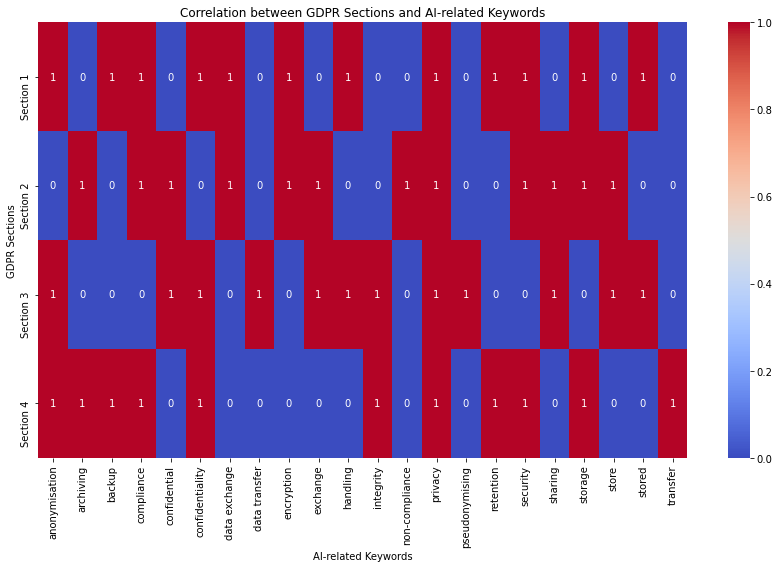

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'GDPR Section': ['Section 1', 'Section 2', 'Section 3', 'Section 4'],
    'anonymisation': [1, 0, 1, 1],
    'archiving': [0, 1, 0, 1],
    'backup': [1, 0, 0, 1],
    'compliance': [1, 1, 0, 1],
    'confidential': [0, 1, 1, 0],
    'confidentiality': [1, 0, 1, 1],
    'data exchange': [1, 1, 0, 0],
    'data transfer': [0, 0, 1, 0],
    'encryption': [1, 1, 0, 0],
    'exchange': [0, 1, 1, 0],
    'handling': [1, 0, 1, 0],
    'integrity': [0, 0, 1, 1],
    'non-compliance': [0, 1, 0, 0],
    'privacy': [1, 1, 1, 1],
    'pseudonymising': [0, 0, 1, 0],
    'retention': [1, 0, 0, 1],
    'security': [1, 1, 0, 1],
    'sharing': [0, 1, 1, 0],
    'storage': [1, 1, 0, 1],
    'store': [0, 1, 1, 0],
    'stored': [1, 0, 1, 0],
    'transfer': [0, 0, 0, 1],
}

df = pd.DataFrame(data)
df.set_index('GDPR Section', inplace=True)
 
    
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, cmap='coolwarm', annot=True, fmt='.0f', cbar=True)

# Customize the plot
plt.title('Correlation between GDPR Sections and AI-related Keywords')
plt.xlabel('AI-related Keywords')
plt.ylabel('GDPR Sections')

# Show the plot
plt.tight_layout()
plt.show()


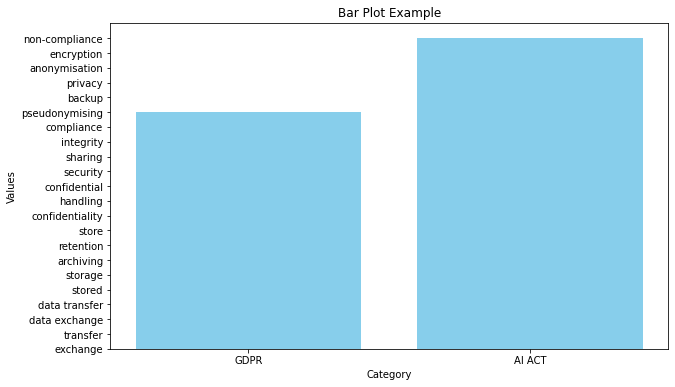

In [31]:
df = pd.DataFrame(AI_GDPR)

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Document'], df['Key Words'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar Plot Example')
plt.show()


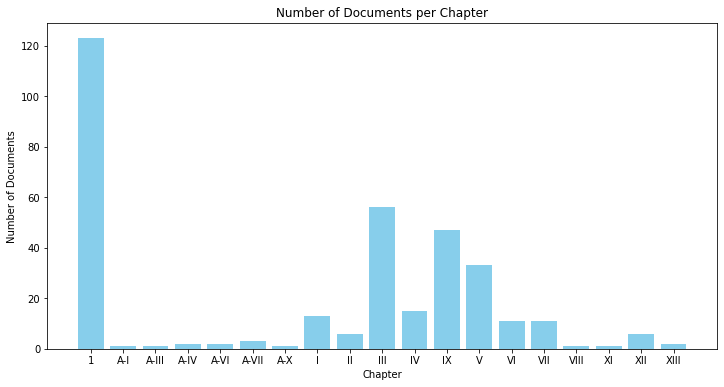

In [32]:
chapter_counts = AI_GDPR.groupby('Chapter')['Document'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(chapter_counts['Chapter'], chapter_counts['Document'], color='skyblue')
plt.xlabel('Chapter')
plt.ylabel('Number of Documents')
plt.title('Number of Documents per Chapter')
plt.show()

# Importing CSV Files to Turtle Format for SQL

In [35]:
import pandas as pd 
from rdflib import Graph, Literal, RDF, URIRef, Namespace
from rdflib.namespace import FOAF , XSD 
import urllib.parse 

In [36]:
g = Graph()
ppl = Namespace('http://example.org/people/')
loc = Namespace('http://mylocations.org/addresses/')
schema = Namespace('http://schema.org/')

In [37]:
for index, row in df.iterrows():
    document_uri = URIRef(ppl + urllib.parse.quote(row['Document']))
    g.add((document_uri, RDF.type, schema.Document))
    g.add((document_uri, URIRef(schema + 'keywords'), Literal(row['Key Words'], datatype=XSD.string)))
    g.add((document_uri, URIRef(schema + 'documentPage'), Literal(row['Document Page'], datatype=XSD.integer)))
    g.add((document_uri, URIRef(schema + 'chapter'), Literal(row['Chapter'], datatype=XSD.string)))
    g.add((document_uri, URIRef(schema + 'section'), Literal(row['Section'], datatype=XSD.string)))
    g.add((document_uri, URIRef(schema + 'article'), Literal(row['Article'], datatype=XSD.string)))
    g.add((document_uri, URIRef(schema + 'provision'), Literal(row['Provision'], datatype=XSD.string)))
    g.add((document_uri, URIRef(schema + 'statement'), Literal(row['Statement'], datatype=XSD.string)))


print(g.serialize(format='turtle'))

@prefix ns1: <http://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.org/people/AI%20ACT> a ns1:Document ;
    ns1:article "2.0"^^xsd:string,
        "3.0"^^xsd:string,
        "8.0"^^xsd:string,
        "9.0"^^xsd:string,
        "10.0"^^xsd:string,
        "11.0"^^xsd:string,
        "13.0"^^xsd:string,
        "15.0"^^xsd:string,
        "17.0"^^xsd:string,
        "20.0"^^xsd:string,
        "21.0"^^xsd:string,
        "22.0"^^xsd:string,
        "23.0"^^xsd:string,
        "24.0"^^xsd:string,
        "25.0"^^xsd:string,
        "28.0"^^xsd:string,
        "29.0"^^xsd:string,
        "31.0"^^xsd:string,
        "34.0"^^xsd:string,
        "38.0"^^xsd:string,
        "39.0"^^xsd:string,
        "42.0"^^xsd:string,
        "43.0"^^xsd:string,
        "44.0"^^xsd:string,
        "46.0"^^xsd:string,
        "47.0"^^xsd:string,
        "50.0"^^xsd:string,
        "52.0"^^xsd:string,
        "53.0"^^xsd:string,
        "54.0"^^xsd:string,
        "55.0"

In [38]:
g.serialize('AI_GDPR_data.ttl',format='turtle')

<Graph identifier=N61b061ae216a43d2b0fa099304874f7d (<class 'rdflib.graph.Graph'>)>